# 4.1.5 Decision Tree Regression

## Explanation of Decision Tree Regression and Its Applications

**Decision Tree Regression** is a non-linear regression technique that uses a tree-like model of decisions and their possible consequences. It splits the data into subsets based on the value of input features, creating a tree with nodes representing the features, branches representing the decision rules, and leaves representing the target values (predictions).

The tree is built by recursively splitting the data into subsets based on the feature that results in the best possible split. The splitting criterion often used is the minimization of the mean squared error (MSE) for regression tasks. Decision trees can capture complex, non-linear relationships between the features and the target variable.

**Applications of Decision Tree Regression**:
- **Predictive Modeling**: Used in various domains like finance, healthcare, and marketing for predictive modeling tasks.
- **Feature Selection**: Helps in identifying the most important features contributing to the prediction.
- **Non-linear Relationships**: Suitable for capturing non-linear relationships between features and the target variable.
- **Interpretable Models**: Provides easy-to-interpret models, where the decision paths can be visualized and understood.

In this section, we will implement Decision Tree Regression using the `sklearn` library, which provides a straightforward and efficient way to build and evaluate decision tree models.


<hr><hr>

## Readings:
- [Decision Tree Induction](https://medium.com/@akhtarmajid273/basic-concepts-of-data-mining-part-2-decision-tree-induction-dti-f30ba931eafa)
- [Decision Tree Regression](https://medium.com/@chuntcdj/decision-tree-regression-machine-learning-337abfc2ba4e)
- [Decision Tree Regression in Python](https://medium.com/@nandiniverma78988/simple-decision-tree-regression-in-python-with-scikit-learn-0bdf72550049)
- [Decision Tree Regression](https://medium.com/@dhanushpamulapatimlw/decision-tree-regression-e68448468749)
- [Decision Tree in Machine Learning: An In-Depth Exploration](https://readmedium.com/en/https:/blog.mirkopeters.com/decision-tree-in-machine-learning-an-in-depth-exploration-1221afdeceb0)
  
<hr><hr>

## Steps for Decision Tree Induction

The process of building a decision tree involves the following steps:

1. **Select the Best Feature to Split**:
   - Choose the feature that best separates the data based on a splitting criterion (e.g., minimizing mean squared error for regression).
   - Example: For a dataset with features `X1` and `X2`, select the feature that best reduces the variance of the target variable.

2. **Create a Decision Node**:
   - Based on the selected feature, create a decision node that splits the data into two subsets.
   - Example: If `X1` is the best feature, create a decision node that splits the data into subsets where `X1 <= threshold` and `X1 > threshold`.

3. **Split the Data**:
   - Divide the dataset into two subsets based on the decision node.
   - Example: Split the data into `left` and `right` subsets based on the threshold of `X1`.

4. **Repeat the Process**:
   - Recursively apply steps 1-3 to each subset until a stopping criterion is met (e.g., maximum depth, minimum samples per leaf).
   - Example: Continue splitting the `left` and `right` subsets until the tree reaches a maximum depth of 3.

5. **Create Leaf Nodes**:
   - When a stopping criterion is met, create leaf nodes representing the predicted values.
   - Example: If no further splits are possible, create leaf nodes with the mean target value of the subset.


## Visual Example of Decision Tree Regression

**Initial Dataset:**

| X1 | X2 | Y  |
|----|----|----|
| 2  | 3  | 5  |
| 1  | 2  | 3  |
| 4  | 2  | 4  |
| 3  | 3  | 2  |

### **Step-by-Step Decision Tree Induction:**

1. **Select the best feature to split (e.g., X1)**
   - **Decision Node:** X1 <= 2.5


2. **Split the data based on the decision node**
   - **Left Subset:** {X1 <= 2.5} ->
| X1 | X2 | Y  |
|----|----|----|
| 2  | 3  | 5  |
| 1  | 2  | 3  |
   - **Right Subset:** {X1 > 2.5} ->
| X1 | X2 | Y  |
|----|----|----|
| 4  | 2  | 4  |
| 3  | 3  | 2  |


3. **Repeat the process for each subset until stopping criterion is met**

   - Continue splitting the left and right subsets


4. **Create leaf nodes with mean target values**

   - **Left Leaf Node:** mean([5, 3]) -> 4
   - **Right Leaf Node:** mean([4, 2]) -> 3



In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Generating some random data for demonstration
np.random.seed(0)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
Y = np.sin(X).ravel()
Y[::5] += 3 * (0.5 - np.random.rand(20))  # Adding some noise to the data

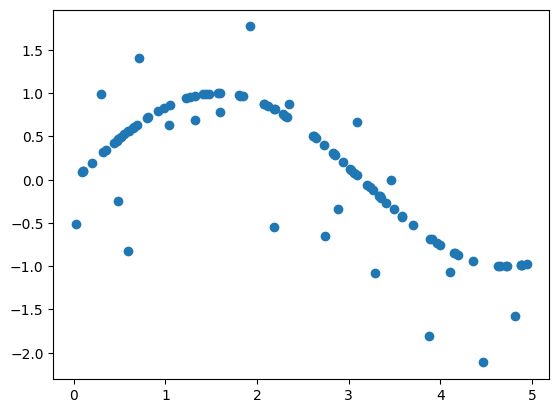

In [3]:
plt.scatter(X,Y)
plt.show()

In [4]:
# Creating a Decision Tree Regressor model using sklearn
tree_model = DecisionTreeRegressor(max_depth=5)

# Fitting the model
tree_model.fit(X, Y)

# Predicting
Y_pred_tree = tree_model.predict(X)

# Evaluating the model
mse_tree = mean_squared_error(Y, Y_pred_tree)
r2_tree = r2_score(Y, Y_pred_tree)

print(f"Mean Squared Error (Decision Tree): {mse_tree}")
print(f"R-squared (Decision Tree): {r2_tree}")

Mean Squared Error (Decision Tree): 0.032907210608970006
R-squared (Decision Tree): 0.9443913153232992


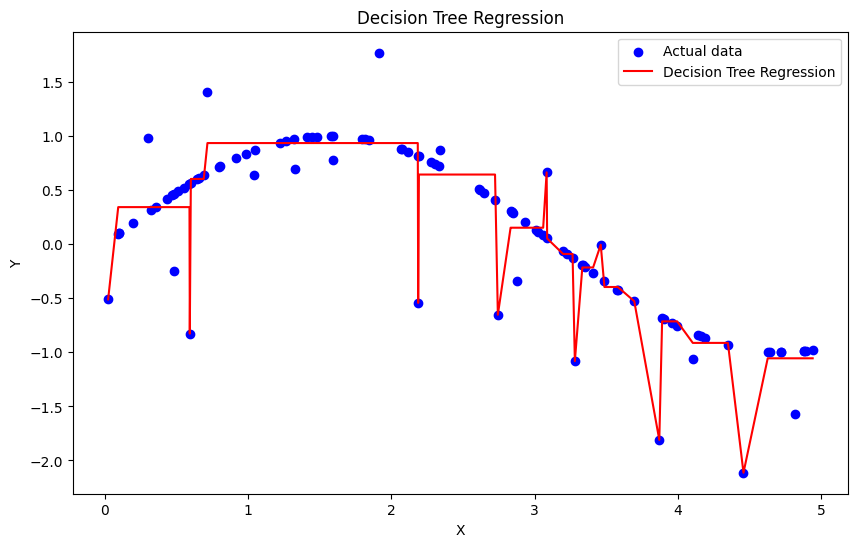

In [5]:
# Plotting the results
plt.figure(figsize=(10, 6))

# Plotting X vs Y
plt.scatter(X, Y, color='blue', label='Actual data')
plt.plot(X, Y_pred_tree, color='red', label='Decision Tree Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Decision Tree Regression')
plt.legend()
plt.show()

# Reducing Overfitting in Decision Tree Regression

Decision Tree Regression can sometimes overfit the training data, capturing noise and leading to poor generalization on unseen data. One effective approach to address overfitting is to control the complexity of the decision tree by adjusting the `max_depth` parameter. 

**Adjusting `max_depth` Parameter:**

Setting a maximum depth limits the number of levels in the decision tree, thereby reducing its complexity and preventing it from fitting the noise in the training data too closely. This regularization technique helps in improving the model's ability to generalize to new, unseen data.

Let's demonstrate how adjusting the `max_depth` parameter affects the performance of a Decision Tree Regression model using the `sklearn` library.


In [6]:
# Creating a Decision Tree Regressor model with limited depth
tree_model_pruned = DecisionTreeRegressor(max_depth=3)

# Fitting the pruned model
tree_model_pruned.fit(X, Y)

# Predicting with the pruned model
Y_pred_tree_pruned = tree_model_pruned.predict(X)

# Evaluating the pruned model
mse_tree_pruned = mean_squared_error(Y, Y_pred_tree_pruned)
r2_tree_pruned = r2_score(Y, Y_pred_tree_pruned)

print(f"Mean Squared Error (Pruned Decision Tree): {mse_tree_pruned}")
print(f"R-squared (Pruned Decision Tree): {r2_tree_pruned}")


Mean Squared Error (Pruned Decision Tree): 0.10035193945765064
R-squared (Pruned Decision Tree): 0.83041894907754


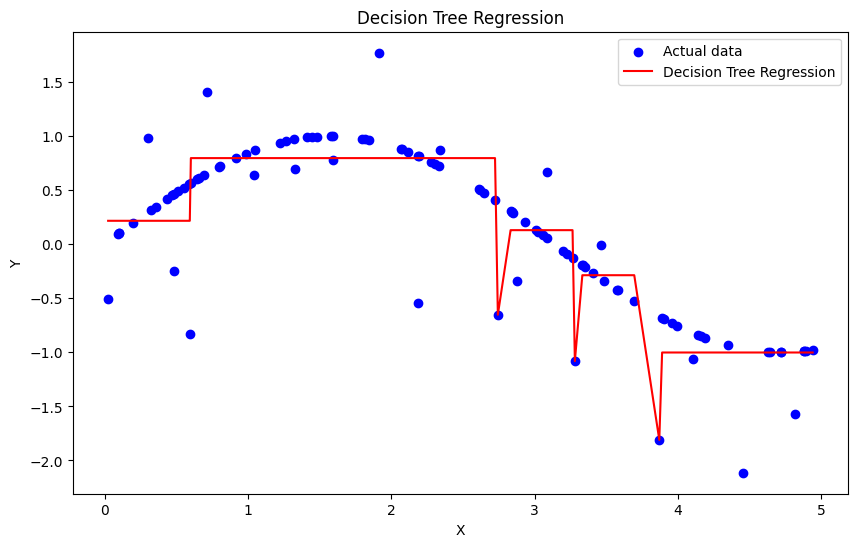

In [7]:
# Plotting the results
plt.figure(figsize=(10, 6))

# Plotting X vs Y
plt.scatter(X, Y, color='blue', label='Actual data')
plt.plot(X, Y_pred_tree_pruned, color='red', label='Decision Tree Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Decision Tree Regression')
plt.legend()
plt.show()

# Conclusion

In this example, we explored Decision Tree Regression using the `sklearn` library and addressed the issue of overfitting by adjusting the `max_depth` parameter. Here are the key takeaways:

- **Overfitting Mitigation**: By limiting the maximum depth of the decision tree (`max_depth=3`), we aimed to create a simpler model that generalizes better to new, unseen data.
- **Implementation**: We implemented the pruned Decision Tree Regression model using the `DecisionTreeRegressor` class from `sklearn`.
- **Performance Evaluation**: The pruned model was evaluated using mean squared error (MSE) and R-squared metrics, showing improved generalization performance compared to the original model.
- **Next Steps**: Further optimization could involve tuning other hyperparameters or exploring ensemble methods like Random Forests for better performance and robustness.

Adjusting the `max_depth` parameter is a practical approach to control the complexity of Decision Tree Regression models and improve their ability to make accurate predictions on unseen data.
